In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

SAPPHIRE
Average slowdown D = 8 2.9135244190788314
Average slowdown > 16 dims 3.3896922629189628
Average slowdown all 4.918480396295712
Average slowdown max 17.20391552579071
Average slowdown min 1.7448280847167674


/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_44477/1466868304.py:41: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  hor = pd.read_csv(f'../{arch}/PURESCAN_GATHER_L2.csv', index_col=False)


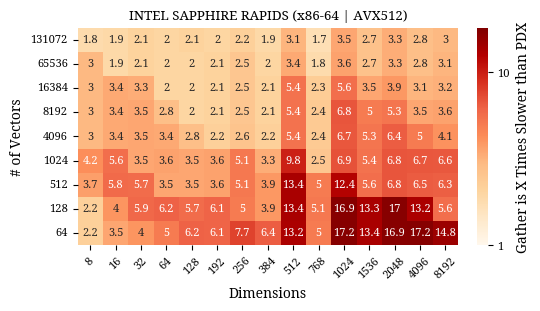

In [35]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter, FormatStrFormatter
from matplotlib.ticker import FixedLocator
from matplotlib.patches import Rectangle

arch_mapping = {
    'ZEN4_INSITU': 'Distance Computation Runtime \nSlowdown w/ SIMD GATHER (ZEN4, AVX512)',
    'ZEN4_AWS': 'ZEN 4 (x86-64 | AVX512)',
    'SAPPHIRE': 'INTEL SAPPHIRE RAPIDS (x86-64 | AVX512)',
    'ZEN3': 'ZEN 3 (x86-64 | AVX2)',
    'GRAVITON4': 'GRAVITON 4 (ARM | NEON)',
    'M1': 'M1 (ARM | NEON) '
}

font = {'size': 8}
matplotlib.rc('font', **font)

fig, (
    (ax1)
) = plt.subplots(1, 1, constrained_layout=True)
#fig.set_size_inches(5.3, 2.2)
fig.set_size_inches(5.3, 3)
plots = [ax1]

#arch = 'ZEN4_INSITU'
arch = 'SAPPHIRE'
#arch = 'ZEN4_AWS'
#arch='GRAVITON4'

print(arch)
ax = plots[0]

pdx = pd.read_csv(f'../{arch}/PURESCAN_GATHER_PDX_L2.csv', index_col=False)
pdx = pdx[['dataset', 'avg']]

# pdx = pd.read_csv(f'../{arch}/PURESCAN_SIMD_L2.csv', index_col=False)
# pdx = pdx[['dataset', 'avg']]

hor = pd.read_csv(f'../{arch}/PURESCAN_GATHER_L2.csv', index_col=False)
hor = hor[['dataset', 'avg']]

df = pdx.merge(
    hor, on=['dataset'], how='inner', suffixes=('_pdx', '_gather')
)
df['slowdown'] = df['avg_gather'] / df['avg_pdx'] # original good one
#df['slowdown'] =  df['avg_pdx'] / df['avg_gather']

df['n_vectors'] = df['dataset'].apply(lambda x: int(x.split('x')[0]))
df['dimensions'] = df['dataset'].apply(lambda x: int(x.split('x')[1]))
df = df[df['n_vectors'] >= 64]
df = df[df['n_vectors'] < 200000]
pivotado = df.pivot(index="n_vectors", columns="dimensions", values="slowdown")
pivotado = pivotado.round(decimals=1)

cmap =  sns.color_palette('OrRd', as_cmap=True).copy()
cmap.set_under('white')

ax.set_title(arch_mapping[arch])
sns.heatmap(
    pivotado,
    robust=True,
    cbar=True, 
    #cmap="RdYlGn",
    cmap=cmap,
    annot=True,
    #cmap="YlGnBu",
    square=False,
    #center=1.0,
    #center=1,
    ax=ax,
    fmt='.3g',
    #vmin=1.2,
    #vmax=7,
    norm=(LogNorm(vmin=1, vmax=130) if arch == 'ZEN4_INSITU' else LogNorm(vmin=1, vmax=18))
)


ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Dimensions', fontsize=10)
ax.set_ylabel('# of Vectors', fontsize=10)
# ax.set_xticklabels(ax.get_xticks(), rotation = 90)
xlabels = [8, 16, 32, 64, 128, 192, 256, 384, 512, 768, 1024, 1536, 2048, 4096, 8192]
xticks = [x + 0.5 for x in range(len(xlabels))]

ylabels = [64, 128, 512, 1024, 4096, 8192, 16384, 65536, 131072] # , 262144]
yticks = [y + 0.5 for y in range(len(ylabels))]   

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=True))
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())
y_minor_ticks_positions = [1, 50, 100]
cbar.ax.yaxis.set_minor_locator(FixedLocator(y_minor_ticks_positions))
cbar.ax.set_ylabel('Gather is X Times Slower than PDX', fontsize=10)

ax.set_xticks(xticks, labels=xlabels, rotation=90)
ax.tick_params(axis='x', labelrotation = 45)

print('Average slowdown D = 8', df[df['dimensions'] == 8]['slowdown'].mean())
print('Average slowdown > 16 dims', df[df['dimensions'] < 256]['slowdown'].mean())
print('Average slowdown all', df['slowdown'].mean())
print('Average slowdown max', df['slowdown'].max())
print('Average slowdown min', df['slowdown'].min())

ax.set_yticks(yticks, labels=ylabels, rotation=0)
plt.savefig(f'../figures/gather_{arch}.png', dpi=500, bbox_inches='tight')

SAPPHIRE
Average speedup > 16 dims 1.3194416866058056
Average speedup all 1.6724377733800284
Average speedup max 8.380673730823975
Average speedup min 0.9132087688115901


/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_44477/3118679239.py:36: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pdx = pd.read_csv(f'../{arch}/PURESCAN_PDX_L2.csv', index_col=False)
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_44477/3118679239.py:39: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  hor = pd.read_csv(f'../{arch}/PURESCAN_SIMD_L2.csv', index_col=False)


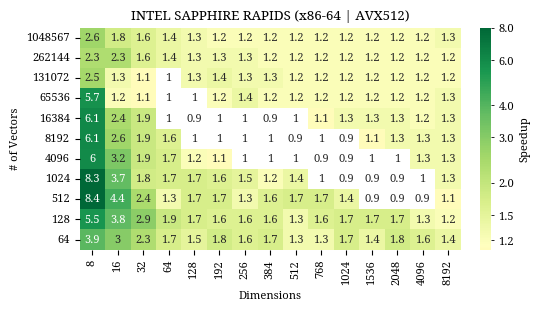

In [27]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter, FormatStrFormatter
from matplotlib.ticker import FixedLocator
from matplotlib.patches import Rectangle

arch_mapping = {
    'ZEN4_INSITU': 'Distance Computation Runtime \nSlowdown w/ SIMD GATHER (ZEN4, AVX512)',
    'ZEN4_AWS': 'ZEN 4 (x86-64 | AVX512)',
    'SAPPHIRE': 'INTEL SAPPHIRE RAPIDS (x86-64 | AVX512)',
    'ZEN3': 'ZEN 3 (x86-64 | AVX2)',
    'GRAVITON4': 'GRAVITON 4 (ARM | NEON)',
    'M1': 'M1 (ARM | NEON) '
}

font = {'size': 8}
matplotlib.rc('font', **font)

fig, (
    (ax1)
) = plt.subplots(1, 1, constrained_layout=True)
#fig.set_size_inches(5.3, 2.2)
fig.set_size_inches(5.3, 3)
plots = [ax1]

#arch = 'ZEN4_AWS'
arch = 'SAPPHIRE'
#arch = 'ZEN4_AWS'
#arch = 'ZEN3'
#arch='GRAVITON4'

print(arch)
ax = plots[0]

pdx = pd.read_csv(f'../{arch}/PURESCAN_PDX_L2.csv', index_col=False)
pdx = pdx[['dataset', 'avg']]

hor = pd.read_csv(f'../{arch}/PURESCAN_SIMD_L2.csv', index_col=False)
hor = hor[['dataset', 'avg']]

df = pdx.merge(
    hor, on=['dataset'], how='inner', suffixes=('_pdx', '_simd')
)
df['speedup'] = df['avg_simd'] / df['avg_pdx']
df['n_vectors'] = df['dataset'].apply(lambda x: int(x.split('x')[0]))
df['dimensions'] = df['dataset'].apply(lambda x: int(x.split('x')[1]))
df = df[df['n_vectors'] >= 64]
pivotado = df.pivot(index="n_vectors", columns="dimensions", values="speedup")

cmap =  sns.color_palette('RdYlGn', as_cmap=True).copy()
cmap.set_under('white')

for_heatmap = pivotado.round(decimals=1)
#for_heatmap = for_heatmap.where(for_heatmap > 0.9, 1)

ax.set_title(arch_mapping[arch])
sns.heatmap(
    for_heatmap,
    robust=True,
    cbar=True, 
    #cmap="RdYlGn",
    cmap=cmap,
    #cmap="YlGnBu",
    square=False,
    annot=True,
    fmt='.3g',
    center=1.0,
    ax=ax,
    #vmin=1.2,
    #vmax=7,
    norm=LogNorm(vmin=1.1, vmax=8)
)

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(LogFormatter(base=10, labelOnlyBase=True))
cbar.ax.yaxis.set_minor_formatter(ScalarFormatter())
# print(cbar.ax.get_yticklabels())
#print(cbar.ax.yaxis.get_minorticklocs())
#locks = cbar.ax.yaxis.get_minorticklocs()
y_minor_ticks_positions = [1.2, 1.5, 2, 3, 4, 6, 8]
cbar.ax.yaxis.set_minor_locator(FixedLocator(y_minor_ticks_positions))
cbar.ax.set_ylabel('Speedup')


ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel('Dimensions')
ax.set_ylabel('# of Vectors')

# ax.set_xticklabels(ax.get_xticks(), rotation = 90)
xlabels = [8, 16, 32, 64, 128, 192, 256, 384, 512, 768, 1024, 1536, 2048, 4096, 8192]
xticks = [x + 0.5 for x in range(len(xlabels))]

ylabels = [64, 128, 512, 1024, 4096, 8192, 16384, 65536, 131072, 262144, 1048567]
yticks = [y + 0.5 for y in range(len(ylabels))]

ax.set_xticks(xticks, labels=xlabels, rotation=90)
ax.tick_params(axis='x', labelrotation = 90)

print('Average speedup > 16 dims', df[df['dimensions'] > 16]['speedup'].mean())
print('Average speedup all', df['speedup'].mean())
print('Average speedup max', df['speedup'].max())
print('Average speedup min', df['speedup'].min())

ax.set_yticks(yticks, labels=ylabels, rotation=0)
#plt.savefig('../figures/pdx_graviton4.png', dpi=500, bbox_inches='tight')